In [3]:
import pandas as pd
import ntpath
import torchvision.transforms as transforms
from imgaug import augmenters as iaa
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg

class dataAugmentation:
    def __init__(self, dataframe_dir, img_dir):
        self.dataframe_dir = dataframe_dir
        self.df = self.read_csv(dataframe_dir)
        self.dir_img = img_dir

    def getItem(self, idx):
        indexed_data = self.df.iloc[idx]
        center= indexed_data[2]
        image_path = os.path.join(self.dir_img, center.strip())
        image = Image.open(image_path)
        angle = float(indexed_data[1])
        return (image, angle)
        
    def aumentar_data(self):
        new_df = self.df.copy()
        
        cont=0;lista=[]        
        for i in range(len(self.df)):
            indexed_data = self.df.iloc[i]
            image_path= os.path.join(self.dir_img,indexed_data[2])
            image = Image.open(image_path)
            angle = float(indexed_data[1])
            newFolderName = os.path.join(image_path.split("/")[:-1][0]+"Aumentada")
        
            if not os.path.exists(newFolderName):
                os.mkdir(newFolderName)
            data=[]
            prob1=0.4
             
            data.append((image, angle))
            (flipped_image, angle_flipped) = self.horizontal_flipping(image, angle)
            if np.random.rand()<prob1:
                data.append((flipped_image, angle_flipped))
            if np.random.rand()<prob1:
                data.append(self.brightness_cambiar(image, angle))
            # if np.random.rand()<prob1:
            #     data.append(self.brightness_cambiar(flipped_image, angle_flipped))
            #if np.random.rand()<prob:
            #     data.append(self.shift(image, angle))
            # if np.random.rand()<prob1:
            #     data.append(self.blur(flipped_image, angle_flipped))
            if np.random.rand()<prob1:
                data.append(self.blur(image, angle))

            for j in range(len(data)):
                img_name = "Img"+str(cont)+".png"
                lista.append({
                    'Angulo': data[j][1],
                    'Nombre_imagen': os.path.join(newFolderName.split('\\')[1], img_name),
                    'Velocidad': 0
                })    
                df = pd.DataFrame(lista)
                df.to_csv(self.dataframe_dir.split(".")[0]+"Aumentada.csv")
                data[j][0].save(os.path.join(newFolderName, img_name))
                cont+=1
        
    def read_csv(self, dir_csv):
        columns = ["id", "angulo", "imagen", "velocidad"]
        data = pd.read_csv(dir_csv, names=columns,header=0)
        return data

    def horizontal_flipping(self, img, angle):
        Horizontal_Flipping_Transformation = transforms.RandomHorizontalFlip(p=1) 
        flipping_img = Horizontal_Flipping_Transformation(img)
        flipping_angle = 120-angle
        return (flipping_img, flipping_angle)
    
    def brightness_cambiar(self, img, angle):
        brightness = transforms.ColorJitter(brightness=(0.4, 1))
        changed_img = brightness(img)
        return (changed_img, angle)
    
    def shift(self, img, angle):
        pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        image = pan.augment_image(np.asarray(img))
        image = Image.fromarray(np.uint8(image))
        return (image, angle)
    
    def blur(self, img, angle):
        transf = transforms.GaussianBlur( (5,9), sigma=(3,5))
        img=transf(img)
        return (img, angle)


In [8]:
dAug = dataAugmentation("dataFrameFinalSinAumentar.csv", "fotsCarrilCompleto")
#dAug.aumentar_data()

In [9]:
import matplotlib.pyplot as plt
def plot_img(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.show()

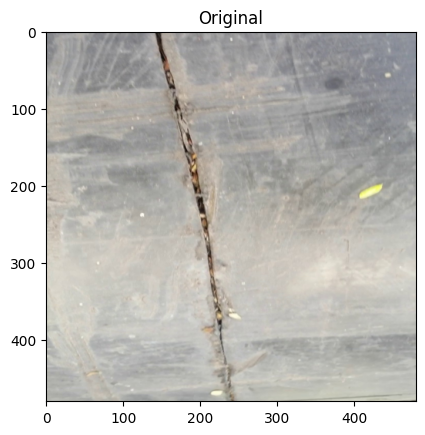

In [15]:
im = Image.open("frame_136.png")
im = im.resize((480, 480))
#fa = dataAugmentation("dataFrameFinalSinAumentar.csv","fotosCarrilCompleto_Dataframes")
#(image, angle) = fa.getItem(300)
plot_img(im, str("Original"))

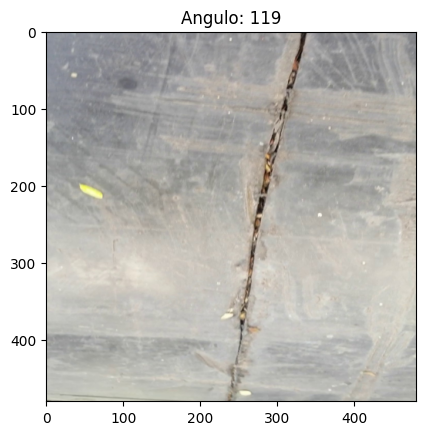

In [18]:
#flipping
(img1, angle1) = dAug.horizontal_flipping(im, 1)
plot_img(img1, "Angulo: "+str(angle1))

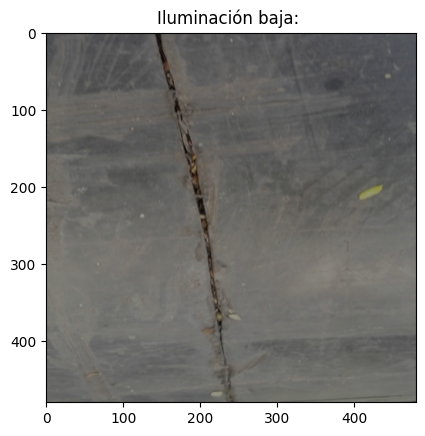

In [19]:
#Brightness
(img2, angle2) = dAug.brightness_cambiar(im, 1)
plot_img(img2, "Iluminación baja: ")

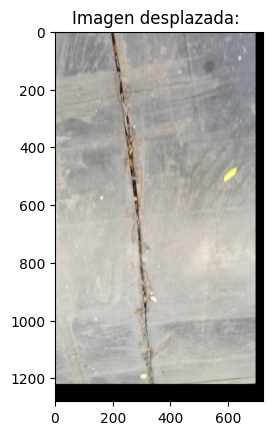

In [13]:
#Shift
(img3, angle3) = dAug.shift(im, 1)
plot_img(img3, "Imagen desplazada: ")

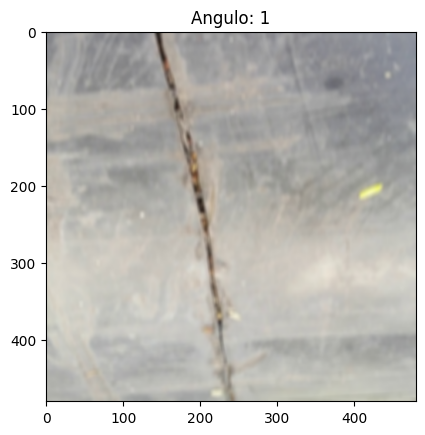

In [20]:
#Random blur
(img4, angle4) = dAug.blur(im, 1)
plot_img(img4, "Angulo: "+str(angle4))